## Housing

### Import Relevant Modules

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

### Data Sourcing, Understanding & Cleaning

In [90]:
#import the dataset
pd.options.display.max_rows=1000
data = pd.read_csv("train.csv")


In [91]:
#Read top 5 rows
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [92]:
#Get info on data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- The dataset has 1460 rows and 81 columns
- There are no columns which are completely null

In [93]:
# Checking if all entries in ID is unique
data['Id'].nunique()


1460

- All the rows have unique 'Id' column and this can be dropped since it doesn't add anything to the model

In [94]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

Looking at the above result, there are few columns which have more than 1000+ null values. Hence checking the percentage of null values

In [95]:
null_vals = 100*(data.isnull().sum()/len(data.index))
round(null_vals,2)


Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

Columns such as Alley, MiscFeature, Fence & PoolQC  have more than 80% of null values and Id Column is redundant, hence dropping these columns

In [96]:
data.drop(['Alley','MiscFeature','Fence','PoolQC','Id'],inplace=True, axis=1)

In [97]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


Number of columns have reduced to 76

Getting Columns which has only null values, to see if the values can be imputed based on Data Dictionary

In [98]:
def getNullColumns():
  null_columns = (data.isnull().sum()/len(data))*100
  null_columns = null_columns[null_columns>0]
  null_columns.sort_values(inplace=True)
  return null_columns

In [99]:
getNullColumns()

Electrical       0.068493
MasVnrType       0.547945
MasVnrArea       0.547945
BsmtQual         2.534247
BsmtCond         2.534247
BsmtFinType1     2.534247
BsmtExposure     2.602740
BsmtFinType2     2.602740
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
LotFrontage     17.739726
FireplaceQu     47.260274
dtype: float64

From the above output, checking for categorical variables, whose nulls can be replaced

In [100]:
data['FireplaceQu'].fillna('No Fireplace',inplace=True) # Replacing nulls with No Fireplace according to data dictionary

In [101]:
def replaceNa(cols, val, inplaceval):
  for col in cols:
    data[col].fillna(val, inplace=inplaceval) 

In [102]:
no_garage_cols = ['GarageCond','GarageQual','GarageFinish','GarageType']
replaceNa(no_garage_cols, 'No Garage',True) # Replacing nulls with No Garage according to data dictionary

In [103]:
no_basement_cols = ['BsmtFinType2','BsmtExposure','BsmtFinType1','BsmtCond','BsmtQual']
replaceNa(no_basement_cols, 'No Basement',True) # Replacing nulls with No Basement according to data dictionary


In [104]:
data['MasVnrType'].fillna('None', inplace=True) # Replacing nulls with None according to data dictionary

In [105]:
#Checking which value appears most in 'Electrical' column
data['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [106]:
#For 'Electrical' Column, there's 1 nan value, and hence replacing this with highest found value in Electrical column based on value counts.
# i.e SBrkr
data['Electrical'].fillna('SBrkr', inplace=True)

In [107]:
#Checking for null Columns
getNullColumns()

MasVnrArea      0.547945
GarageYrBlt     5.547945
LotFrontage    17.739726
dtype: float64

Describing Data in MasVnrArea, GarageYrBlt, LotFrontage columns
And Checking for outliers in numerical data

In [108]:
print("MassVnr Area %F \n",data['MasVnrArea'].describe(), end = '\n\n')
print("Lot Frontage %F \n",data['LotFrontage'].describe(), end = '\n\n')

MassVnr Area %F 
 count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

Lot Frontage %F 
 count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64



In [109]:
#Identifying outliers in numerical data
data.describe(percentiles=[.25,.5,.75,.90,.95,.99])[['LotFrontage','MasVnrArea','GarageYrBlt']]

,LotFrontage,MasVnrArea,GarageYrBlt
count,1201.000000,1452.000000,1379.000000
mean,70.049958,103.685262,1978.506164
std,24.284752,181.066207,24.689725
min,21.000000,0.000000,1900.000000
25%,59.000000,0.000000,1961.000000
50%,69.000000,0.000000,1980.000000
75%,80.000000,166.000000,2002.000000
90%,96.000000,335.000000,2006.000000
95%,107.000000,456.000000,2007.000000
99%,141.000000,791.920000,2009.000000


In [110]:
#Replacing the numerical variables using median values
data["MasVnrArea"].fillna(data['MasVnrArea'].median(),inplace=True)
data["GarageYrBlt"].fillna(data['GarageYrBlt'].median(),inplace=True)
data["LotFrontage"].fillna(data['LotFrontage'].median(),inplace=True)

In [111]:
#Checking for null Columns
getNullColumns()
#there are no columns with null values

Series([], dtype: float64)

In [112]:
def cleanUpOutLiers(x, col, max, min):
  x = x[x[col]<=max]
  x = x[x[col]>=min]
  return x

Max val :  107.5
Min val :  31.5


<AxesSubplot:title={'center':'After Cleaning outliers'}, xlabel='LotFrontage'>

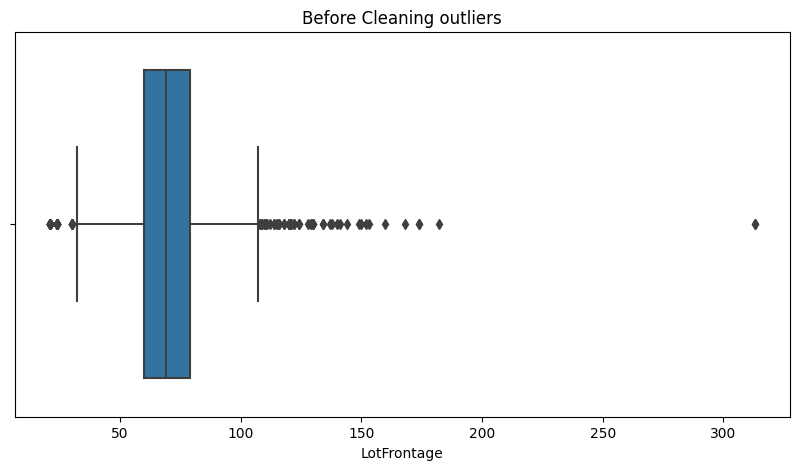

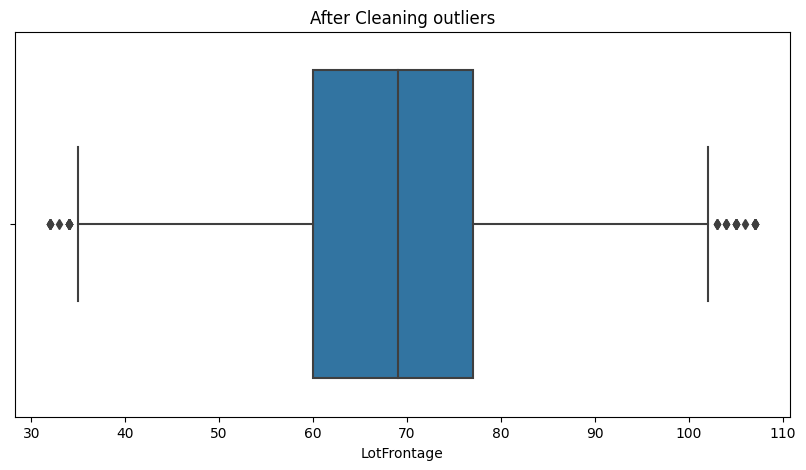

In [113]:
# Remove outliers for LotFrontage

plt.figure(figsize=(10, 5))
plt.title("Before Cleaning outliers")
sns.boxplot(data['LotFrontage'])

IQR = data["LotFrontage"].quantile(0.75) - data["LotFrontage"].quantile(0.25)
max = data["LotFrontage"].quantile(0.75) + 1.5 * IQR
min = data["LotFrontage"].quantile(0.25) - 1.5 * IQR

print("Max val : ",max)
print("Min val : ",min)

data = cleanUpOutLiers(data,"LotFrontage",max,min)

plt.figure(figsize=(10, 5))
plt.title("After Cleaning outliers")
sns.boxplot(data['LotFrontage'])


Max val :  398.75
Min val :  -239.25


<AxesSubplot:title={'center':'After Cleaning outliers'}, xlabel='MasVnrArea'>

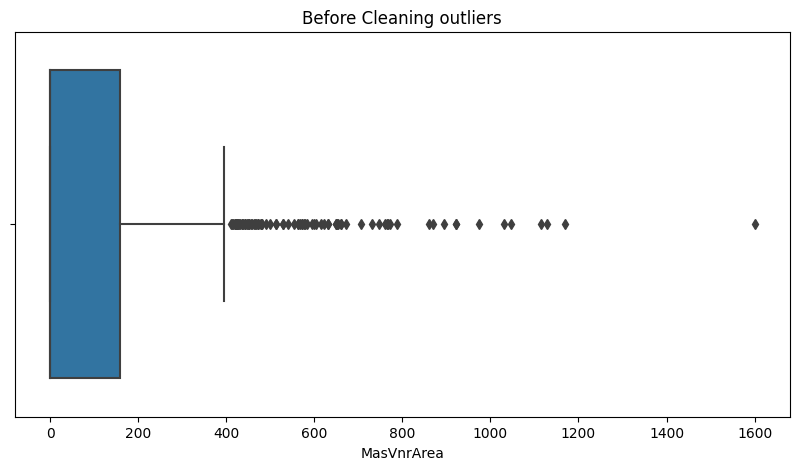

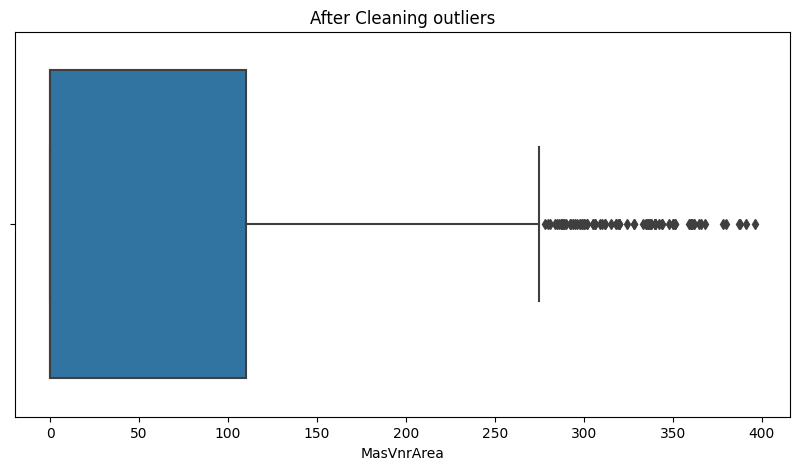

In [114]:
# Remove outliers for MasVnrArea

plt.figure(figsize=(10, 5))
plt.title("Before Cleaning outliers")
sns.boxplot(data['MasVnrArea'])

IQR = data["MasVnrArea"].quantile(0.75) - data["MasVnrArea"].quantile(0.25)
max = data["MasVnrArea"].quantile(0.75) + 1.5 * IQR
min = data["MasVnrArea"].quantile(0.25) - 1.5 * IQR

print("Max val : ",max)
print("Min val : ",min)

data = cleanUpOutLiers(data,"MasVnrArea",max,min)

plt.figure(figsize=(10, 5))
plt.title("After Cleaning outliers")
sns.boxplot(data['MasVnrArea'])


In [115]:
#Adding a column called age compared to 2023
data['HouseAge'] = 2023 - data['YearBuilt']

Checking if any Column has only single value. So that it can be dropped

In [116]:
data.nunique()<=1
#There are no columns with the same value in all rows

MSSubClass       False
MSZoning         False
LotFrontage      False
LotArea          False
Street           False
LotShape         False
LandContour      False
Utilities         True
LotConfig        False
LandSlope        False
Neighborhood     False
Condition1       False
Condition2       False
BldgType         False
HouseStyle       False
OverallQual      False
OverallCond      False
YearBuilt        False
YearRemodAdd     False
RoofStyle        False
RoofMatl         False
Exterior1st      False
Exterior2nd      False
MasVnrType       False
MasVnrArea       False
ExterQual        False
ExterCond        False
Foundation       False
BsmtQual         False
BsmtCond         False
BsmtExposure     False
BsmtFinType1     False
BsmtFinSF1       False
BsmtFinType2     False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
Heating          False
HeatingQC        False
CentralAir       False
Electrical       False
1stFlrSF         False
2ndFlrSF         False
LowQualFinS

### Data Analysis

Performing Data Analysis on cleanup code

Text(0, 0.5, 'Sale Price')

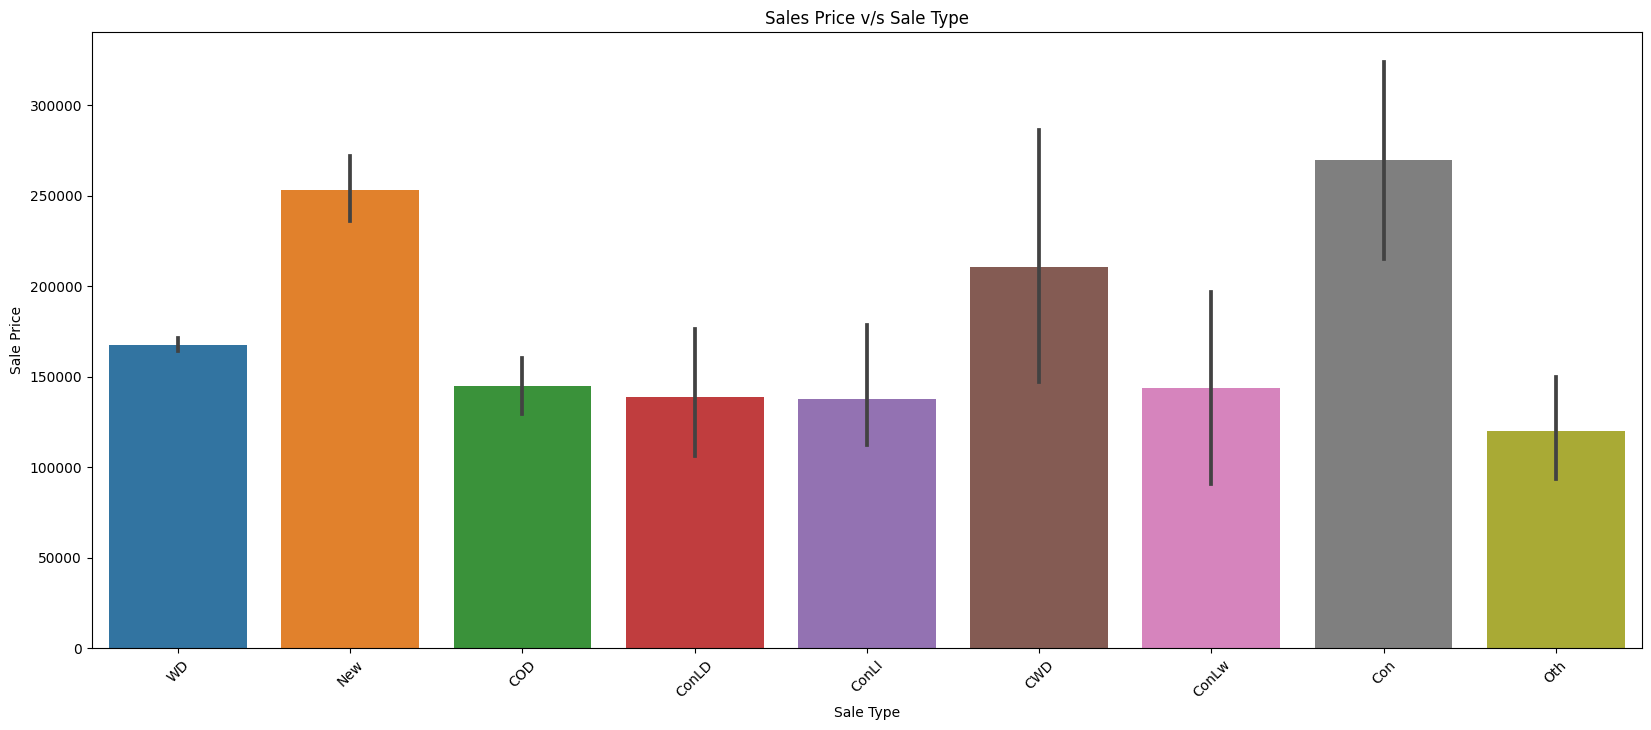

In [117]:
plt.figure(figsize=(20, 8))
sns.barplot(x="SaleType", y="SalePrice", data= data)
plt.title("Sales Price v/s Sale Type")
plt.xticks(rotation=45)
plt.xlabel("Sale Type")
plt.ylabel("Sale Price")

We can observe that the type of sale will affect the sale price, for ex : "Home just constructed and sold" and "Contract 15% Down payment regular terms" of Sale Type has higher sale price average compared to others

Text(0, 0.5, 'Sales Price')

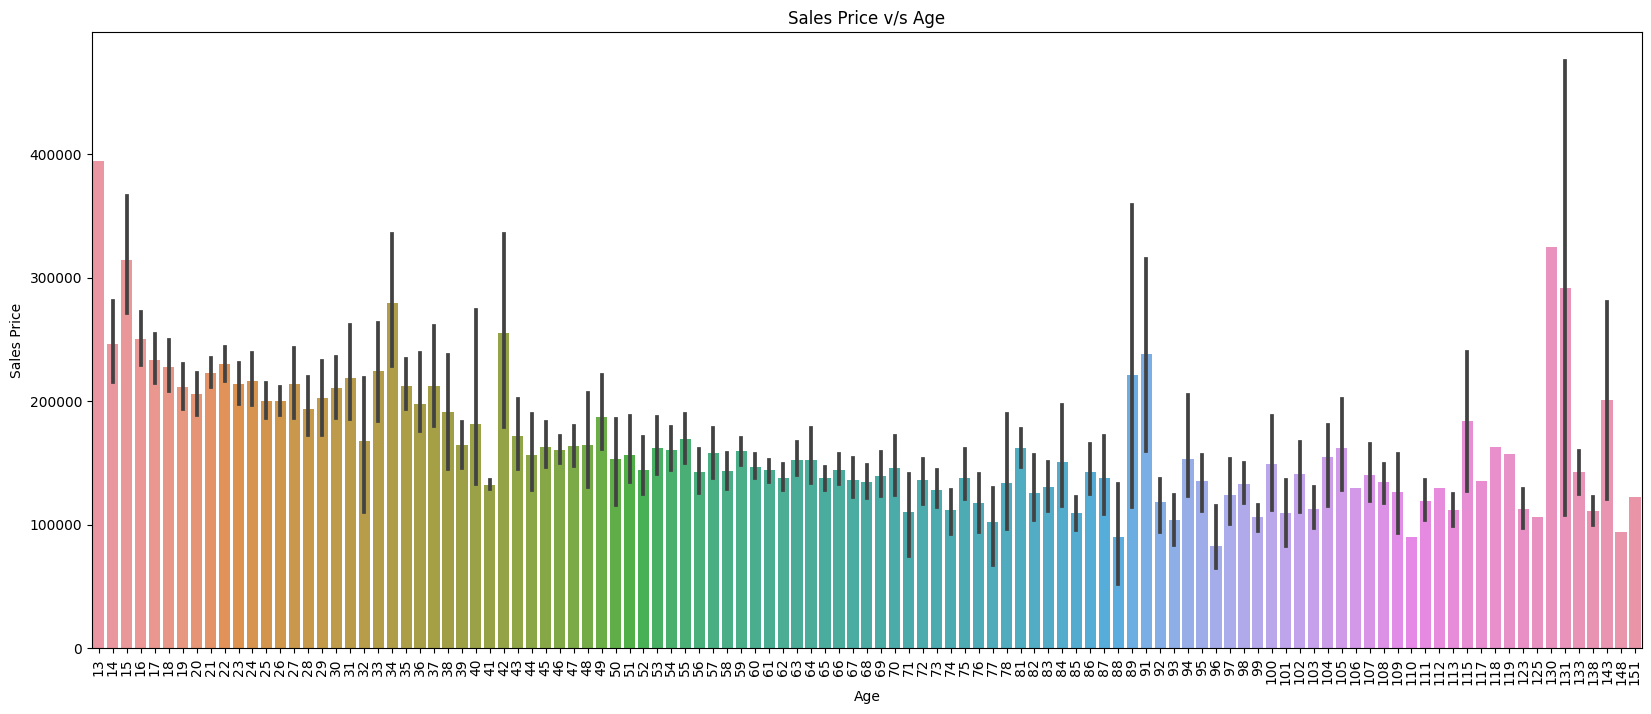

In [118]:
plt.figure(figsize=(20, 8))
sns.barplot(x="HouseAge", y="SalePrice", data= data)
plt.title("Sales Price v/s Age")
plt.xticks(rotation=90)
plt.xlabel("Age")
plt.ylabel("Sales Price")

We can observe that houses that are of ages 43 and above have lesser sales pricecompared to that of newly build houses

Text(0, 0.5, 'Sales Price')

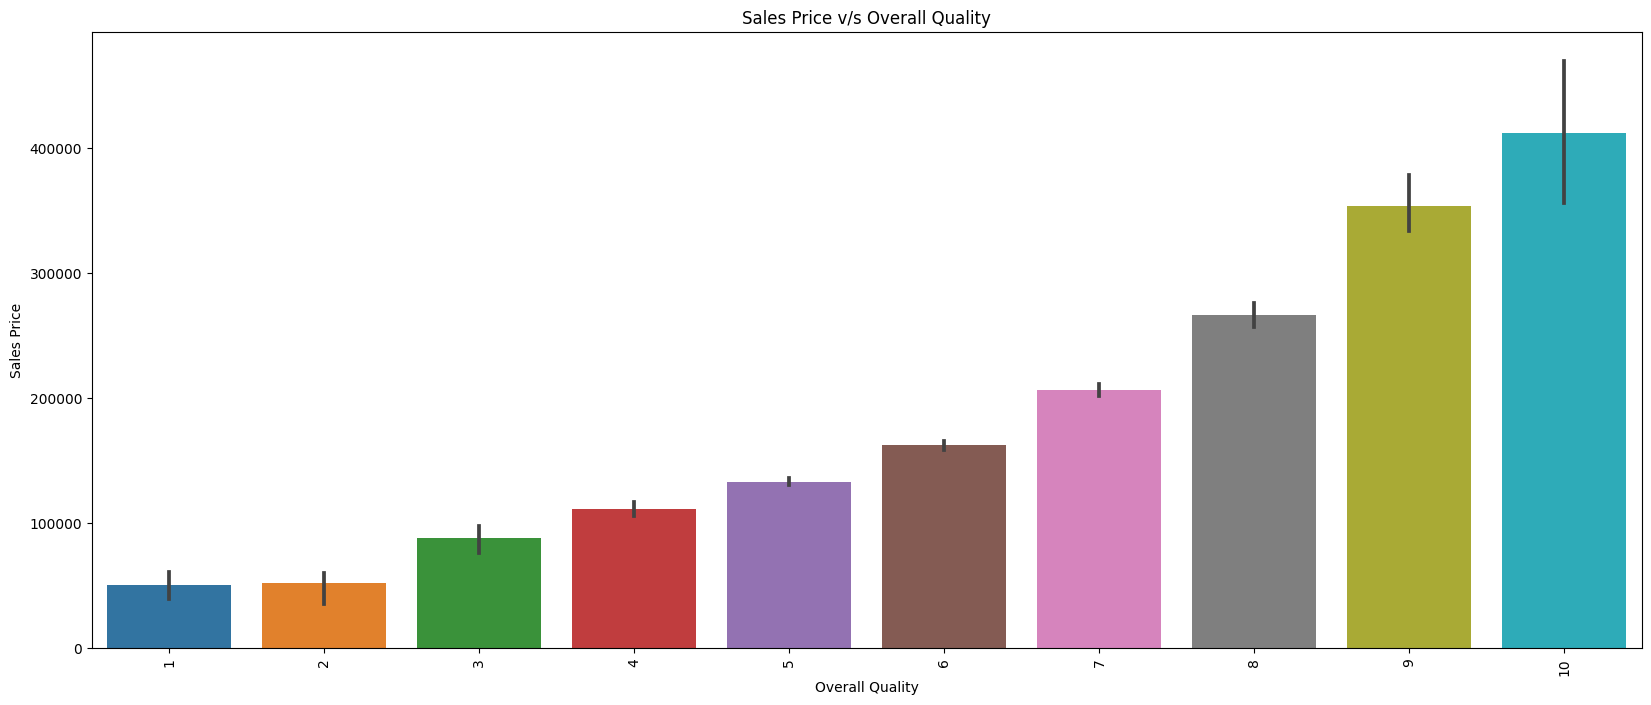

In [119]:
plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= data)
plt.title("Sales Price v/s Overall Quality")
plt.xticks(rotation=90)
plt.xlabel("Overall Quality")
plt.ylabel("Sales Price")

We can observe that as quality of the house increases, the sale price increases as well.

Text(0, 0.5, 'Sales Price')

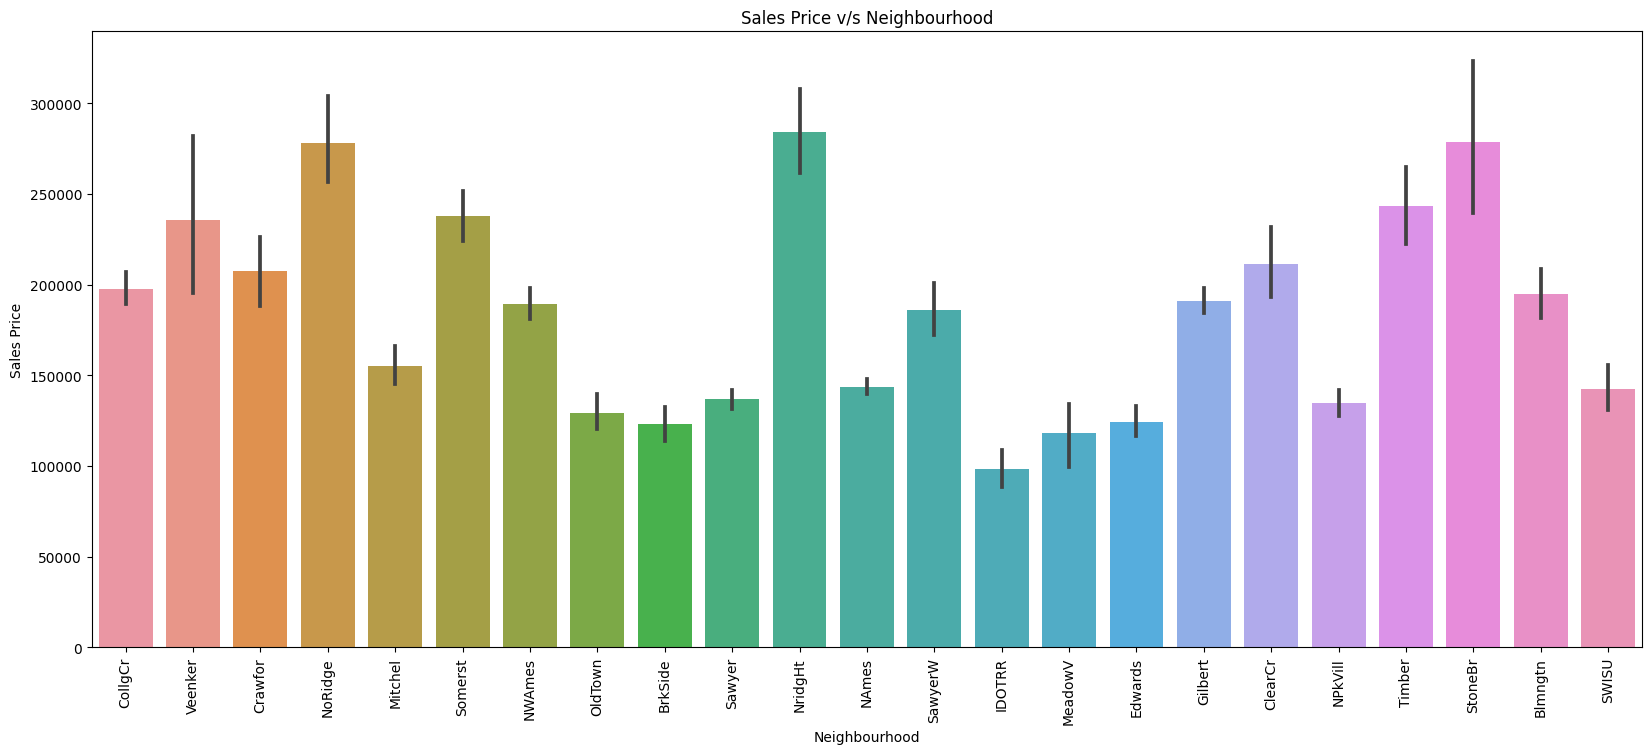

In [120]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= data)
plt.title("Sales Price v/s Neighbourhood")
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood")
plt.ylabel("Sales Price")

We can observe the average sales price varies based on the neighbourhood

Text(0, 0.5, 'Sales Price')

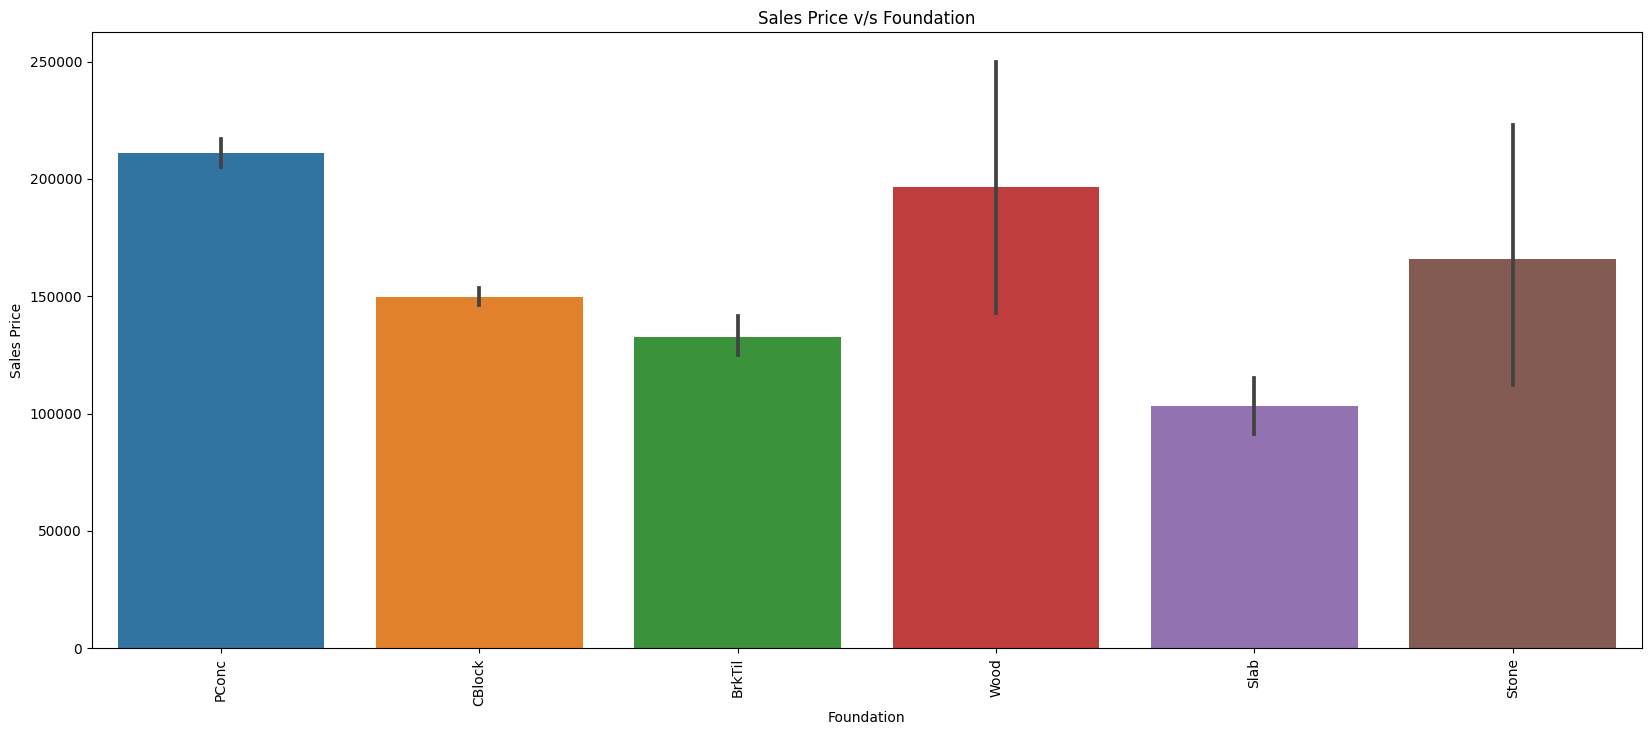

In [121]:
plt.figure(figsize=(20, 8))
sns.barplot(x="Foundation", y="SalePrice", data= data)
plt.title("Sales Price v/s Foundation")
plt.xticks(rotation=90)
plt.xlabel("Foundation")
plt.ylabel("Sales Price")

We can observe that certain foundation leads to increase in sales price

##### Getting Correlations

In [122]:
correlation = data.corr()
correlation

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,HouseAge
MSSubClass,1.000000,-0.262879,-0.078081,0.081823,-0.062178,0.001758,0.052908,-0.018192,-0.039186,-0.094434,...,0.016604,0.012886,-0.033885,-0.018068,0.009066,0.002529,-0.015497,-0.025686,-0.010040,-0.001758
LotFrontage,-0.262879,1.000000,0.208415,0.200721,-0.050441,0.161589,0.061521,0.253013,0.106015,0.083262,...,0.090077,-0.058833,0.070779,0.062976,0.027938,0.006331,0.031326,0.013579,0.316972,-0.161589
LotArea,-0.078081,0.208415,1.000000,0.066159,-0.012145,0.019243,-0.003858,0.064067,0.168800,0.075253,...,0.067728,-0.034360,0.029191,0.059843,0.031838,0.044820,0.013217,-0.031392,0.240991,-0.019243
OverallQual,0.081823,0.200721,0.066159,1.000000,-0.061823,0.554935,0.532944,0.341272,0.178389,-0.042080,...,0.299604,-0.122066,0.032316,0.056970,0.009628,-0.030046,0.088203,-0.021811,0.801274,-0.554935
OverallCond,-0.062178,-0.050441,-0.012145,-0.061823,1.000000,-0.365771,0.094071,-0.113404,-0.043285,0.039022,...,-0.023034,0.090843,0.036789,0.061990,0.023191,0.070765,-0.003072,0.043402,-0.057807,0.365771
YearBuilt,0.001758,0.161589,0.019243,0.554935,-0.365771,1.000000,0.576673,0.323598,0.256837,-0.030911,...,0.171822,-0.405600,0.030753,-0.059283,0.007079,-0.032126,0.019894,-0.011501,0.551162,-1.000000
YearRemodAdd,0.052908,0.061521,-0.003858,0.532944,0.094071,0.576673,1.000000,0.155686,0.105186,-0.046457,...,0.207437,-0.203155,0.048500,-0.048705,-0.011693,-0.008334,0.023267,0.041506,0.530249,-0.576673
MasVnrArea,-0.018192,0.253013,0.064067,0.341272,-0.113404,0.323598,0.155686,1.000000,0.224101,-0.051544,...,0.102496,-0.119192,0.041917,0.041862,0.000186,-0.037927,0.048283,0.021383,0.380480,-0.323598
BsmtFinSF1,-0.039186,0.106015,0.168800,0.178389,-0.043285,0.256837,0.105186,0.224101,1.000000,-0.046797,...,0.057788,-0.125874,0.019678,0.063285,0.004911,0.002199,0.000349,0.007154,0.362955,-0.256837
BsmtFinSF2,-0.094434,0.083262,0.075253,-0.042080,0.039022,-0.030911,-0.046457,-0.051544,-0.046797,1.000000,...,0.035532,0.026943,-0.029378,0.089443,0.051827,0.006913,-0.008411,0.023137,0.009725,0.030911


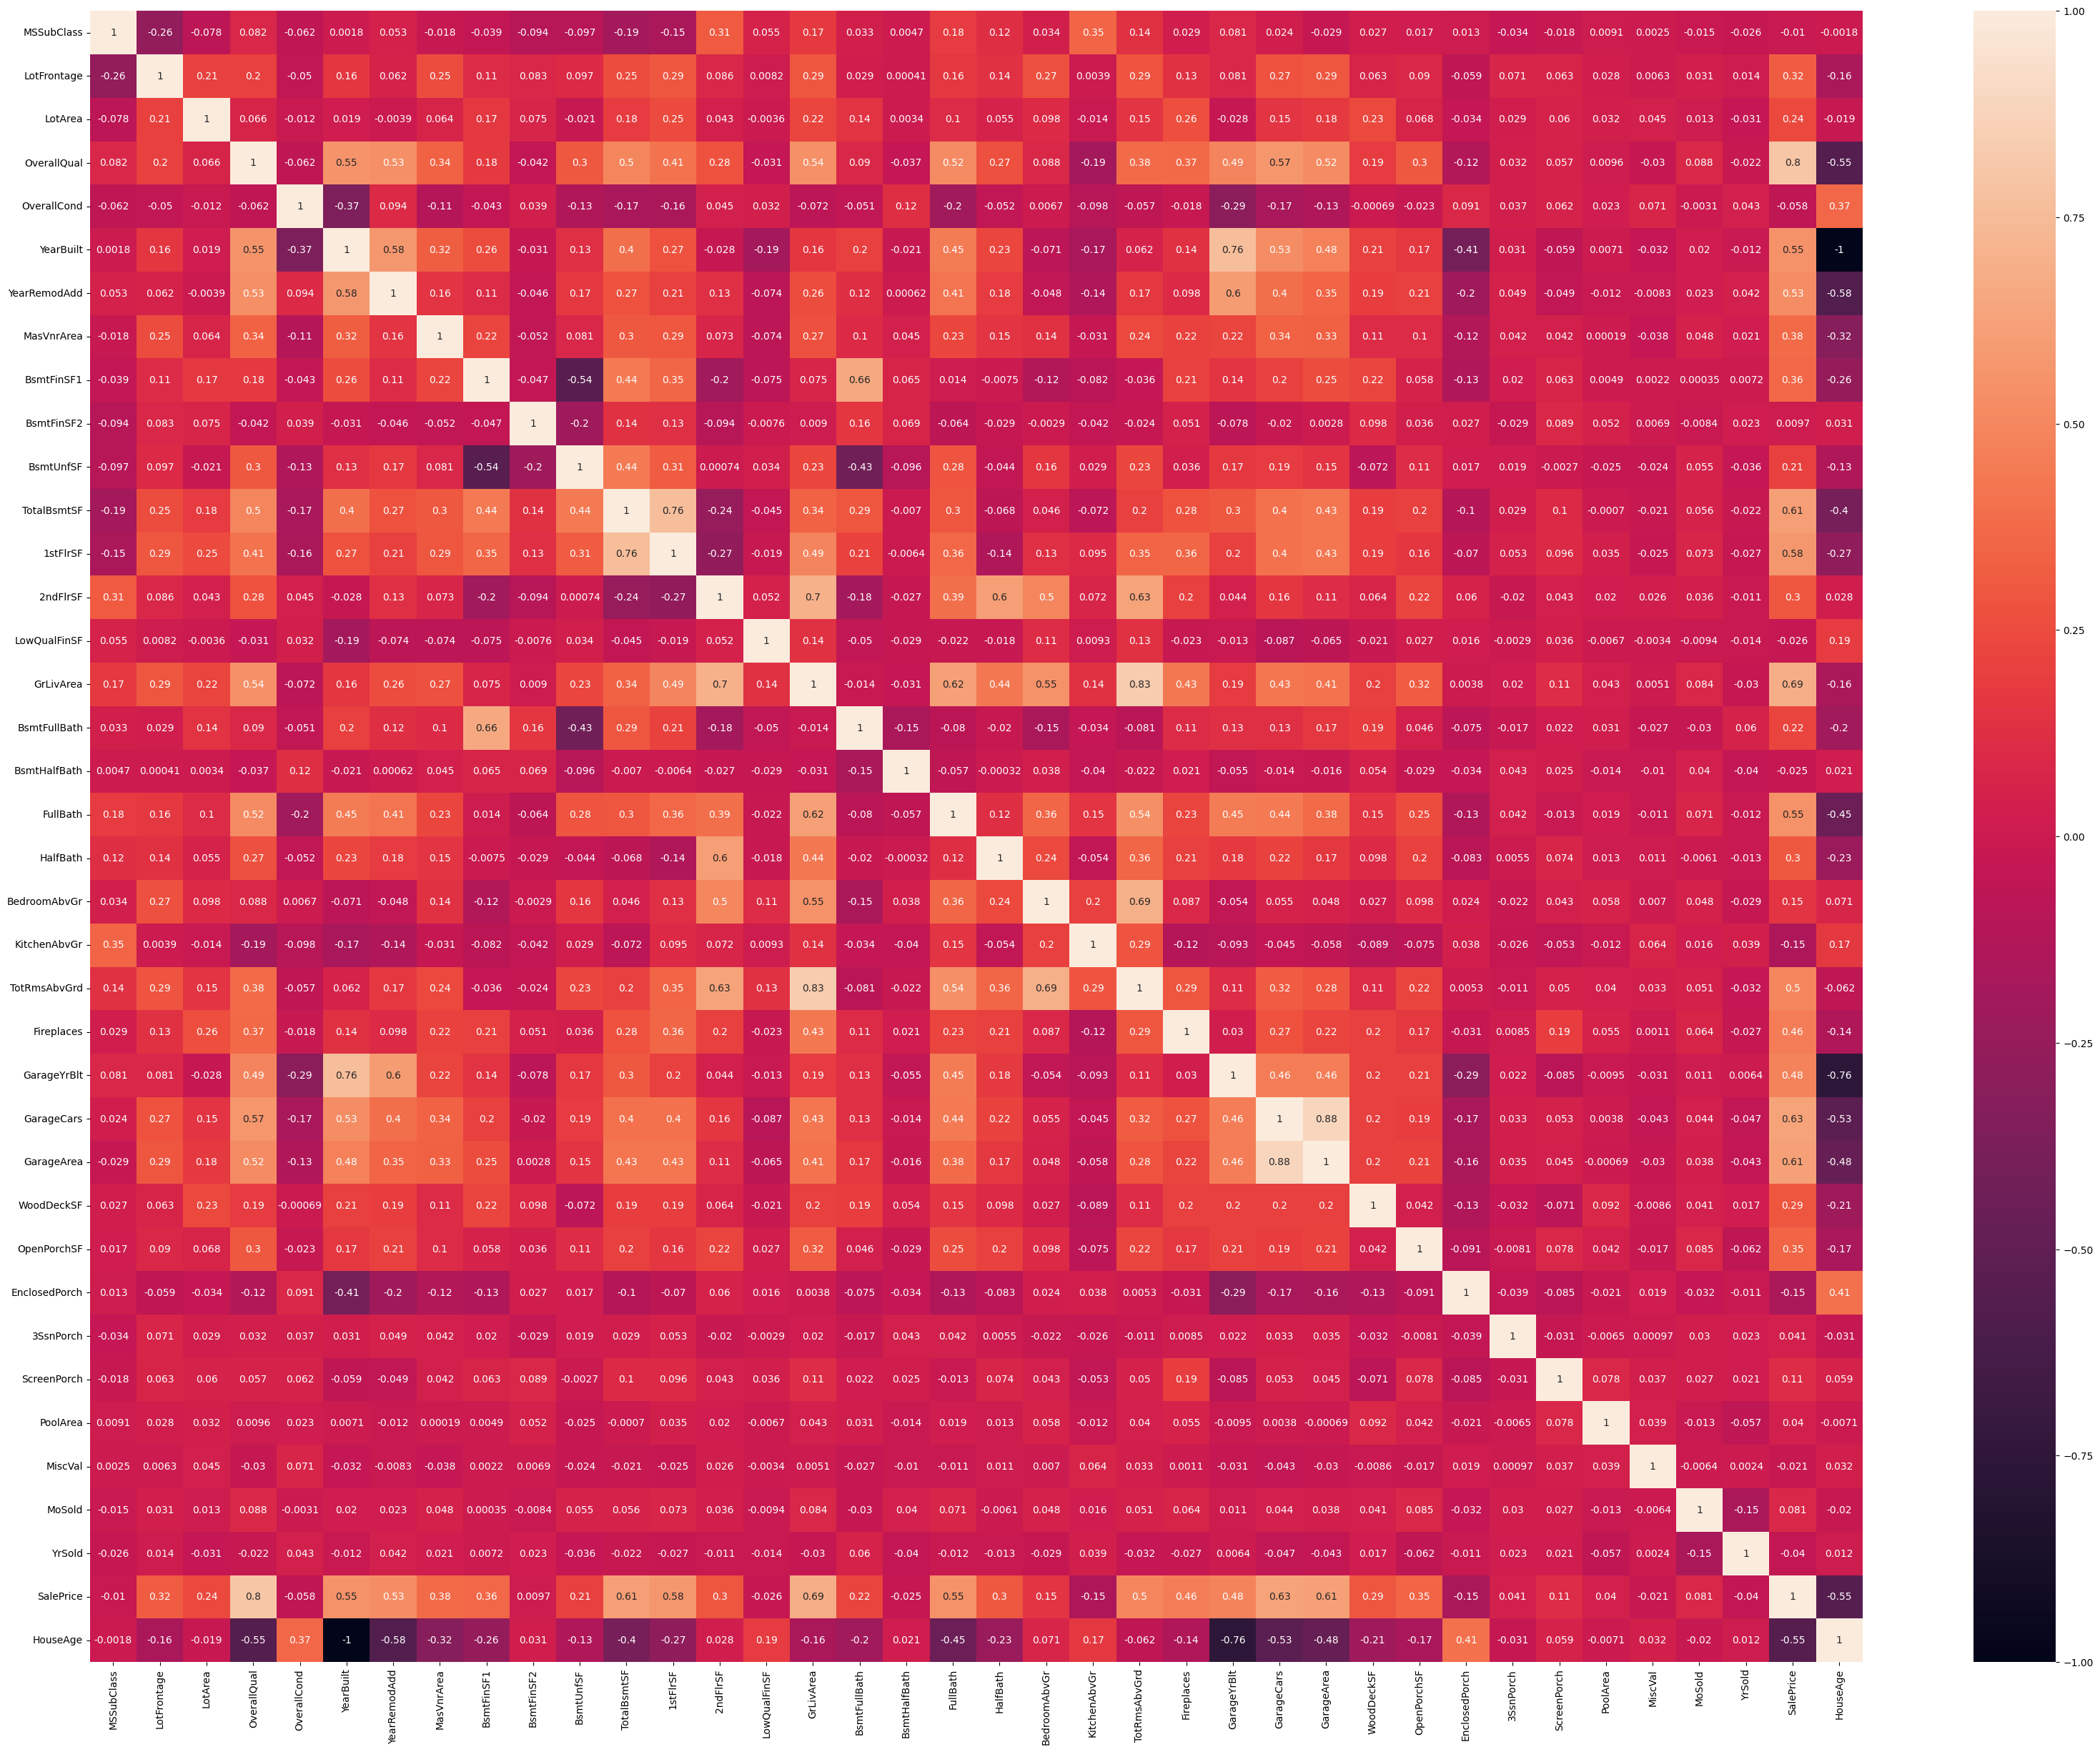

In [123]:
plt.figure(figsize=(40,30))
sns.heatmap(correlation,annot=True)
plt.show()

From the above heatmap, we can observe that some of these columns are correlated ex : columns such as yearbuild and garageyrbuilt

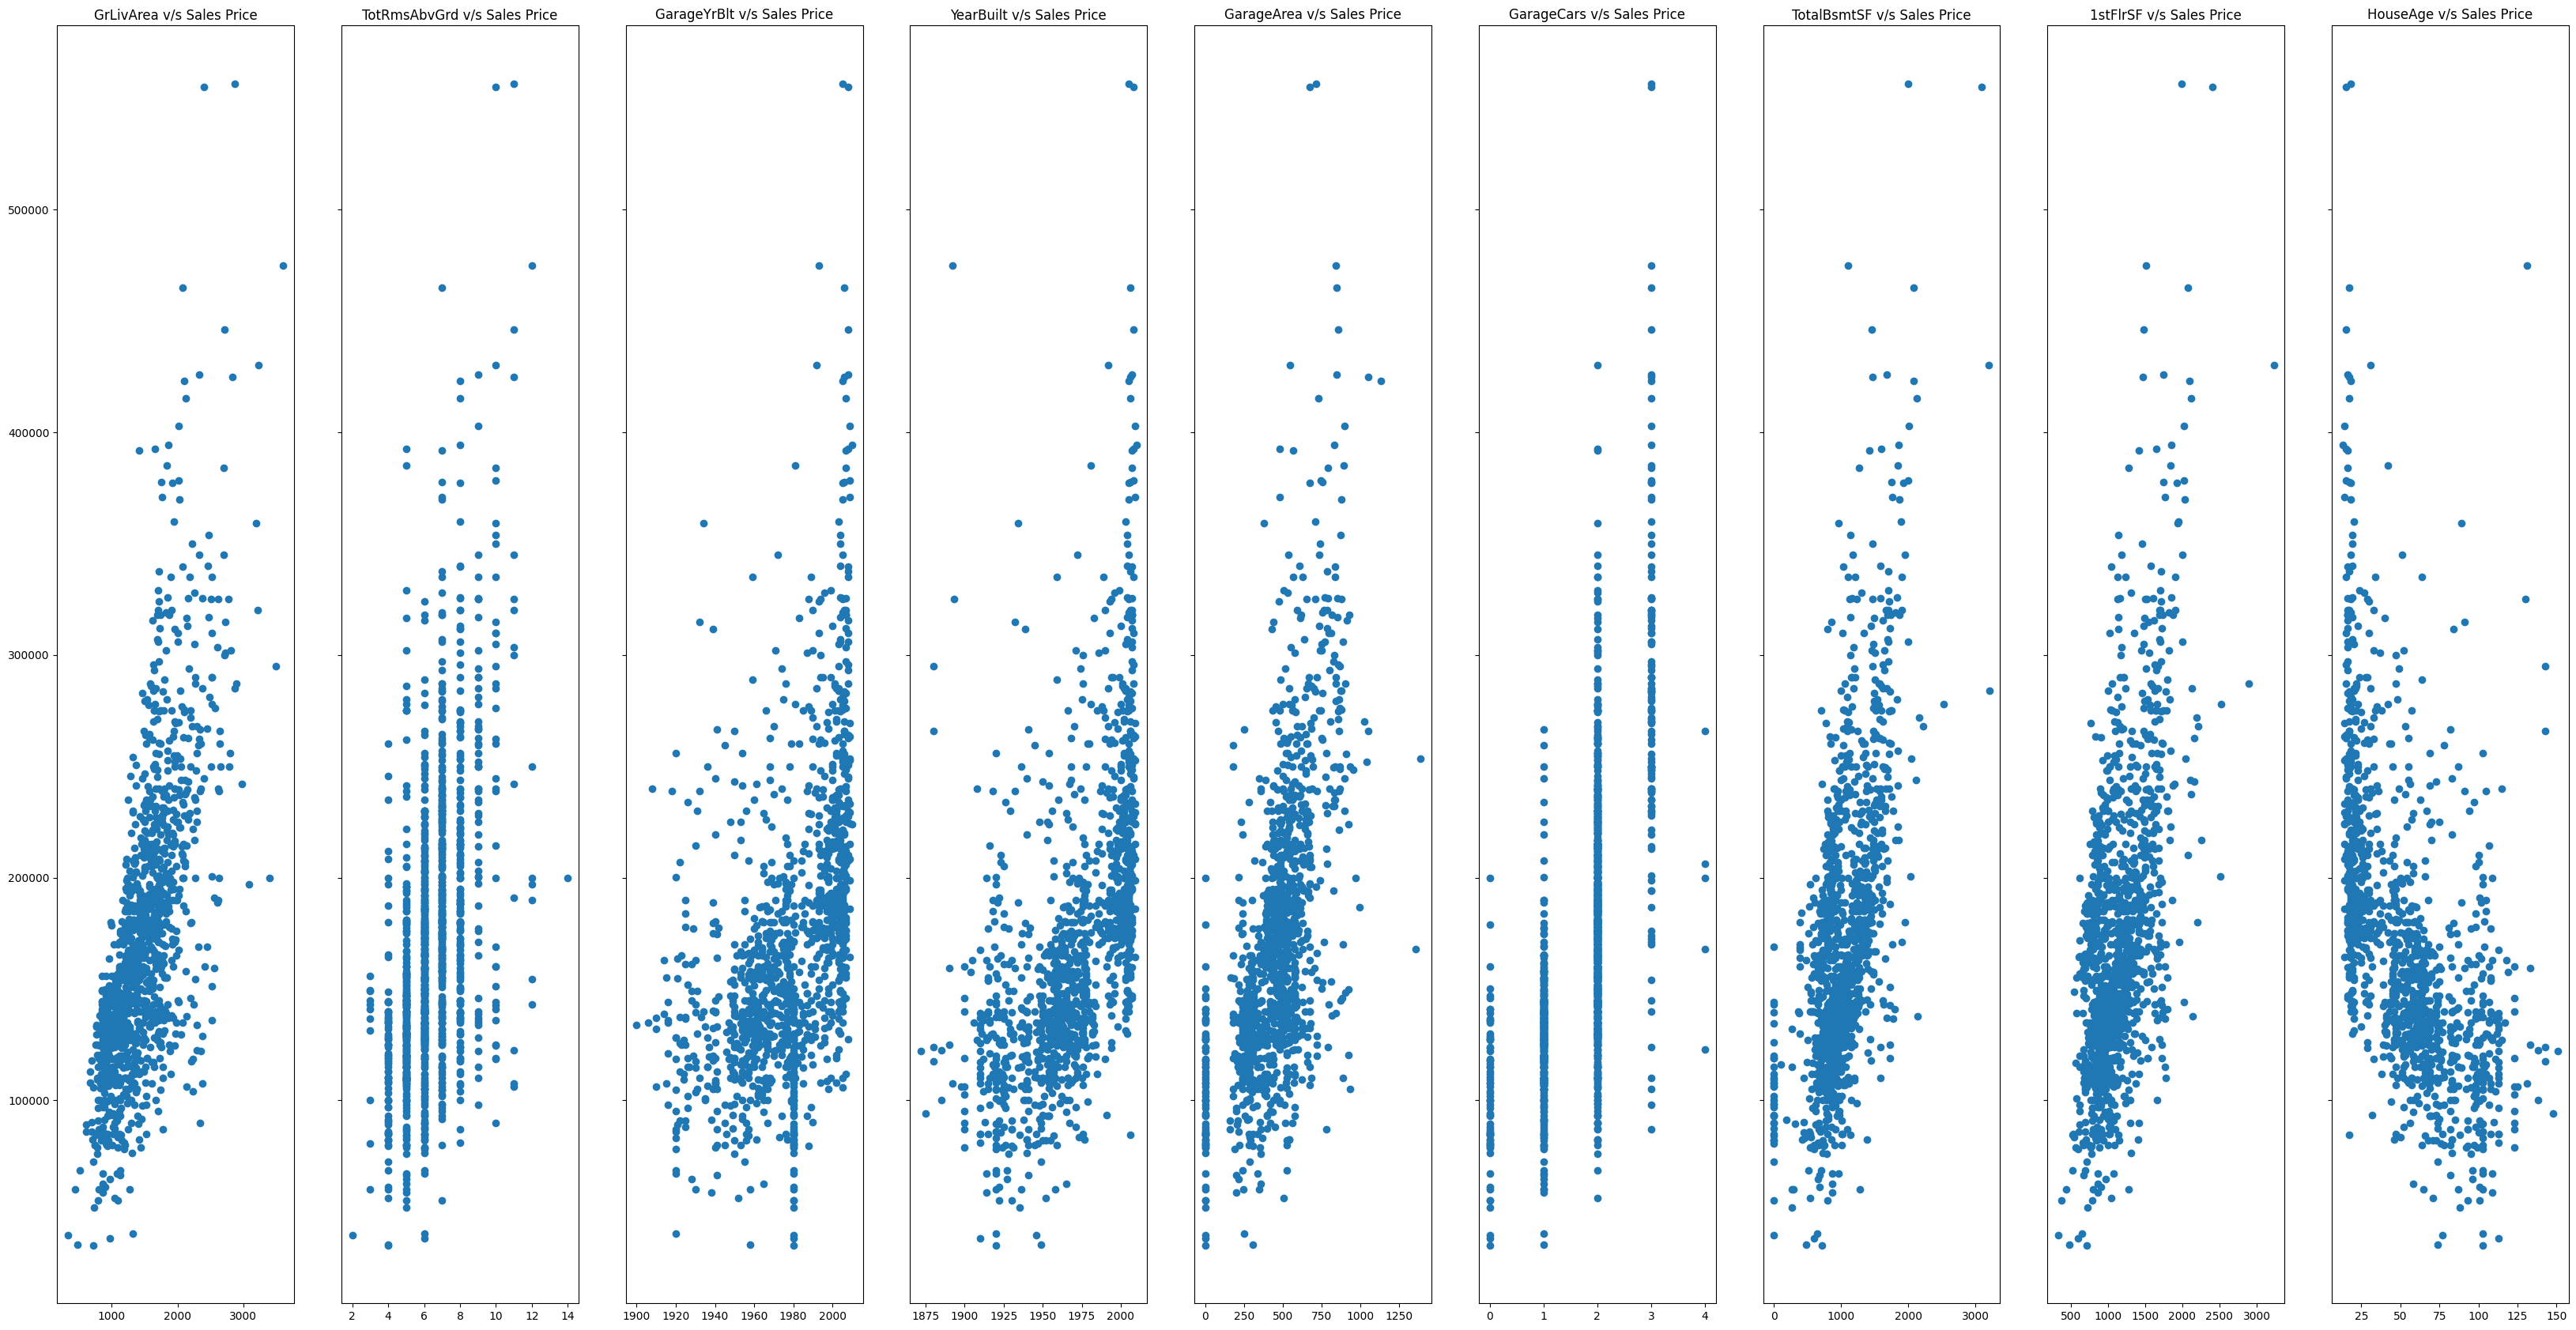

In [124]:
#Checking if the correlated columns and sales have a linear relationship

correlated_cols = ['GrLivArea','TotRmsAbvGrd', 'GarageYrBlt', 'YearBuilt', 'GarageArea', 'GarageCars', 'TotalBsmtSF','1stFlrSF','HouseAge']


fig, ax = plt.subplots(ncols=len(correlated_cols),sharey=True) # says create subplot with 9 columns and share y axis for all these subplots

cor_col_id=0
for col in correlated_cols:
  ax[cor_col_id].scatter(data[col],data['SalePrice'])
  currTitle = col +" v/s Sales Price"
  ax[cor_col_id].set_title(currTitle)
  cor_col_id = cor_col_id+1

fig.set_size_inches(41, 21, forward=True)
plt.show()

In [125]:
# Dropping the columns that are not helping with the sales price and dropping one of the columns that are correlated to each other
data.drop(['GarageCars'], axis = 1, inplace=True)
data.drop(['TotRmsAbvGrd'], axis = 1, inplace=True)
data.drop(['1stFlrSF'], axis = 1, inplace=True) 
data.drop(['GarageYrBlt'], axis = 1, inplace=True)   
data.drop(['YearBuilt'], axis = 1, inplace=True)    
data.drop(['MoSold'], axis = 1, inplace=True) 
data.drop(['YearRemodAdd'], axis = 1, inplace=True) 


In [126]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2008,WD,Normal,208500,20
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,2007,WD,Normal,181500,47
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2008,WD,Normal,223500,22
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2006,WD,Abnorml,140000,108
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,2008,WD,Normal,250000,23


The number of columns reduced to 70

In [127]:
cat_cols = list(data.select_dtypes(include=['object']).columns)

#Printing value counts in each categorical column to see if there's any variance
for col in cat_cols:
  print(data[col].value_counts(),end='\n\n')



RL         1017
RM          178
FV           48
RH           15
C (all)       9
Name: MSZoning, dtype: int64

Pave    1263
Grvl       4
Name: Street, dtype: int64

Reg    810
IR1    422
IR2     30
IR3      5
Name: LotShape, dtype: int64

Lvl    1142
Bnk      54
HLS      40
Low      31
Name: LandContour, dtype: int64

AllPub    1267
Name: Utilities, dtype: int64

Inside     925
Corner     216
CulDSac     81
FR2         42
FR3          3
Name: LotConfig, dtype: int64

Gtl    1201
Mod      55
Sev      11
Name: LandSlope, dtype: int64

NAmes      210
CollgCr    140
OldTown    109
Edwards     91
Sawyer      72
Gilbert     72
NWAmes      66
Somerst     64
SawyerW     57
BrkSide     57
NridgHt     50
Mitchel     46
Crawfor     44
IDOTRR      34
Timber      30
ClearCr     25
SWISU       25
StoneBr     19
NoRidge     18
Blmngtn     17
Veenker     10
MeadowV      7
NPkVill      4
Name: Neighborhood, dtype: int64

Norm      1087
Feedr       73
Artery      44
RRAn        26
PosN        16
RRAe    

Dropping columns that shows low variance in their values

In [128]:
data.drop(['Heating','Street','Utilities','Condition2','RoofMatl'],axis=1,inplace=True)


In [129]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2008,WD,Normal,208500,20
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,0,0,0,0,0,2007,WD,Normal,181500,47
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,0,0,0,0,0,2008,WD,Normal,223500,22
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,272,0,0,0,0,2006,WD,Abnorml,140000,108
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,0,0,0,0,0,2008,WD,Normal,250000,23


Checking variance in numerical columns

In [130]:
def getNumColumns(x):
  num_cols = list(x.select_dtypes(include=['int64','int32','float64','float32']).columns)
  return num_cols

In [131]:
num_cols = getNumColumns(data)

#Printing value counts in each categorical column to see if there's any variance
for col in num_cols:
  print(data[col].value_counts(),end='\n\n')

20     476
60     250
50     135
120     79
30      65
70      57
80      54
90      48
190     30
160     20
85      19
75      15
45      12
40       4
180      3
Name: MSSubClass, dtype: int64

69.0     252
60.0     143
70.0      70
80.0      62
50.0      56
75.0      51
65.0      42
85.0      35
78.0      23
90.0      21
68.0      19
64.0      18
73.0      17
55.0      17
79.0      16
72.0      16
63.0      15
51.0      15
100.0     14
74.0      14
52.0      13
66.0      13
59.0      13
67.0      12
43.0      12
40.0      12
57.0      12
71.0      11
76.0      11
92.0      10
53.0      10
88.0      10
77.0       9
35.0       9
84.0       9
86.0       9
82.0       8
34.0       8
62.0       8
44.0       8
93.0       7
58.0       7
61.0       7
98.0       7
36.0       6
89.0       6
54.0       6
41.0       6
94.0       6
96.0       6
37.0       5
107.0      5
81.0       5
48.0       5
102.0      4
105.0      4
95.0       4
87.0       4
49.0       4
47.0       4
32.0       4
91.0      

In [132]:
# The columns 3SsnPorch, PoolArea & MiscVal has less variance in its data, hence dropping those columns
data.drop(['PoolArea','MiscVal','3SsnPorch'],axis=1,inplace=True)

In [133]:
data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,...,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice,HouseAge
0,60,RL,65.0,8450,Reg,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,61,0,0,2008,WD,Normal,208500,20
1,20,RL,80.0,9600,Reg,Lvl,FR2,Gtl,Veenker,Feedr,...,Y,298,0,0,0,2007,WD,Normal,181500,47
2,60,RL,68.0,11250,IR1,Lvl,Inside,Gtl,CollgCr,Norm,...,Y,0,42,0,0,2008,WD,Normal,223500,22
3,70,RL,60.0,9550,IR1,Lvl,Corner,Gtl,Crawfor,Norm,...,Y,0,35,272,0,2006,WD,Abnorml,140000,108
4,60,RL,84.0,14260,IR1,Lvl,FR2,Gtl,NoRidge,Norm,...,Y,192,84,0,0,2008,WD,Normal,250000,23


After Cleaning up the data and removing few columns we have 62 columns to be used for our models

### Data Preparation

Creating Dummy Variables for Categorical Data

In [134]:
data = pd.get_dummies(data,drop_first=True)


In [135]:
data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [136]:
#Take Sale Price from Data and put it in y variable
y = data.pop('SalePrice') 
y.tail()

1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, dtype: int64

In [137]:
# X will be whatever left in data
X = data
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,196.0,706,0,150,856,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,0.0,978,0,284,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,162.0,486,0,434,920,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,0.0,216,0,540,756,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,350.0,655,0,490,1145,...,0,0,0,0,1,0,0,0,1,0


In [138]:
#help(train_test_split)
#Splitting data into 70:30 Train:test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [139]:
# Rows and Columns in X & y Train and Test data after keeping train size as 70%
print("X Train Rows v/s Columns",X_train.shape)
print("X Test Rows v/s Columns",X_test.shape)
print("y Train Rows v/s Columns",y_train.shape)
print("y Test Rows v/s Columns",y_test.shape)

X Train Rows v/s Columns (886, 214)
X Test Rows v/s Columns (381, 214)
y Train Rows v/s Columns (886,)
y Test Rows v/s Columns (381,)


Rescalling The Features
 - The scale of numerical columns are different and needs to be scaled to similar standards or normals so that coefficients obtained are all on the same scale

In [140]:



scaler = MinMaxScaler()

#Get list of numerical variables
num_vars = getNumColumns(X_train)
print(num_vars)


# Fit on data
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])


['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'YrSold', 'HouseAge']


In [141]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
921,0.411765,0.466667,0.041817,0.444444,0.714286,0.000000,0.613469,0.00000,0.088637,0.396756,...,0,0,0,0,1,0,0,0,1,0
1212,0.058824,0.240000,0.045277,0.333333,0.571429,0.000000,0.194680,0.00000,0.154644,0.209607,...,0,0,0,0,1,0,0,0,1,0
491,0.176471,0.626667,0.046199,0.555556,0.714286,0.000000,0.228070,0.11194,0.112211,0.251404,...,0,0,0,0,1,0,0,0,1,0
1301,0.294118,0.493333,0.033967,0.555556,0.714286,0.000000,0.309564,0.00000,0.105611,0.240487,...,0,0,0,0,1,0,0,0,1,0
176,0.235294,0.866667,0.049513,0.555556,0.428571,0.676768,0.470289,0.00000,0.150872,0.359014,...,0,0,0,0,1,0,0,0,1,0


In [142]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,0.202629,0.480903,0.050673,0.550790,0.513222,0.158033,0.244027,0.034614,0.256684,0.320226,...,0.003386,0.003386,0.067720,0.002257,0.886005,0.003386,0.006772,0.016930,0.835214,0.068849
std,0.231050,0.183501,0.045431,0.146493,0.160415,0.262287,0.231338,0.114026,0.194460,0.122303,...,0.058124,0.058124,0.251407,0.047485,0.317985,0.058124,0.082059,0.129082,0.371196,0.253340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.373333,0.034894,0.444444,0.428571,0.000000,0.000000,0.000000,0.099953,0.251404,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.493333,0.044961,0.555556,0.428571,0.000000,0.222411,0.000000,0.216879,0.307548,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.573333,0.056899,0.666667,0.571429,0.272727,0.395444,0.000000,0.373880,0.387009,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Linear Regression with RFE

In [143]:
# Instantiate
lr = LinearRegression()

# Fit a line
lr.fit(X_train, y_train)

rfe = RFE(lr,n_features_to_select=50)
rfe = rfe.fit(X_train,y_train)

In [144]:
# Features based on RFE
X_train.columns[rfe.support_]

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'KitchenAbvGr', 'GarageArea', 'HouseAge', 'MSZoning_FV',
       'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'LandSlope_Sev',
       'Neighborhood_Crawfor', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Condition1_PosA', 'HouseStyle_2.5Fin', 'RoofStyle_Shed',
       'Exterior1st_BrkComm', 'Exterior2nd_Brk Cmn', 'ExterQual_Fa',
       'ExterQual_Gd', 'ExterQual_TA', 'BsmtQual_Fa', 'BsmtQual_Gd',
       'BsmtQual_No Basement', 'BsmtQual_TA', 'BsmtExposure_Gd',
       'BsmtFinType2_No Basement', 'KitchenQual_Gd', 'KitchenQual_TA',
       'Functional_Sev', 'GarageQual_Fa', 'GarageQual_Gd', 'GarageQual_Po',
       'GarageQual_TA', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA', 'SaleType_Con', 'SaleType_ConLD', 'SaleType_New'],
      dtype='object')

In [145]:
#Training Set with RFE variables
X_train_rfe = pd.DataFrame(X_train[X_train.columns[rfe.support_]])
X_train_rfe.head()

,MSSubClass,LotArea,OverallQual,OverallCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,...,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,SaleType_Con,SaleType_ConLD,SaleType_New
921,0.411765,0.041817,0.444444,0.714286,0.613469,0.00000,0.088637,0.396756,0.510451,0.569945,...,0,0,0,0,0,0,0,0,0,0
1212,0.058824,0.045277,0.333333,0.571429,0.194680,0.00000,0.154644,0.209607,0.000000,0.103238,...,0,0,1,0,0,0,1,0,0,0
491,0.176471,0.046199,0.555556,0.714286,0.228070,0.11194,0.112211,0.251404,0.341034,0.379963,...,0,0,1,0,0,0,1,0,0,0
1301,0.294118,0.033967,0.555556,0.714286,0.309564,0.00000,0.105611,0.240487,0.407591,0.354307,...,0,0,1,0,0,0,1,0,0,0
176,0.235294,0.049513,0.555556,0.428571,0.470289,0.00000,0.150872,0.359014,0.492849,0.527184,...,0,0,1,0,0,0,1,0,0,0


In [146]:
# predict y_training data
y_train_pred = lr.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9419590109735723

In [147]:
y_test_pred = lr.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-9.551795367851451e+17

If we compare the r2 of Train and Test, it shows that the train data predicted around 94% of the values, but for test data the value is too low i.e -8.54. Hence we'll be going with Lasso/Ridge Regression

In [148]:
lr_metric = []
r2_train_lr = r2_score(y_train, y_train_pred)
print("R2 Train : ",r2_train_lr)
lr_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_test_pred)
print("R2 Test : ",r2_test_lr)
lr_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_train_pred))
print("Residual Sum Squared Train : ",rss1_lr)
lr_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_test_pred))
print("Residual Sum Squared Test : ",rss2_lr)
lr_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error Train:",mse_train_lr)
lr_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error Test:",mse_test_lr)
lr_metric.append(mse_test_lr**0.5)

R2 Train :  0.9419590109735723
R2 Test :  -9.551795367851451e+17
Residual Sum Squared Train :  235419776965.1359
Residual Sum Squared Test :  1.4862487098538608e+30
Mean Squared Error Train: 265710809.215729
Mean Squared Error Test: 3.9009152489602646e+27


### Model Building & Evaluation using Ridge and Lasso

##### Ridge

In [149]:
#List of Alphas to select from
# If Value is high this will lead to underfitting and if value is too low it'll lead to overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [150]:
print(model_cv.best_params_['alpha'])

alpha_ridge = model_cv.best_params_['alpha']

2.0


In [151]:
#Instantiate Ridge Model
ridge = Ridge(alpha=alpha_ridge)

#Fit Train Data using Ridge
ridge.fit(X_train, y_train)

Ridge(alpha=2.0)

In [152]:
# Calculating Metrics Such as r2, mean_squared_error
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

ridge_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
ridge_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
ridge_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
ridge_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
ridge_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
ridge_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
ridge_metric.append(mse_test_lr**0.5)

R2 Train :  0.9305749456504631
R2 Test :  0.8996574353721515
Residual Sum Squared Train :  281594629673.152
Residual Sum Squared Test :  156131911832.52197
Mean Squared Error Train: 317826895.79362524
Mean Squared Error Test: 409795044.1798477


Observation
- The R2 Values of Train and Test data have less difference.

Text(0.5, 0, 'Errors')

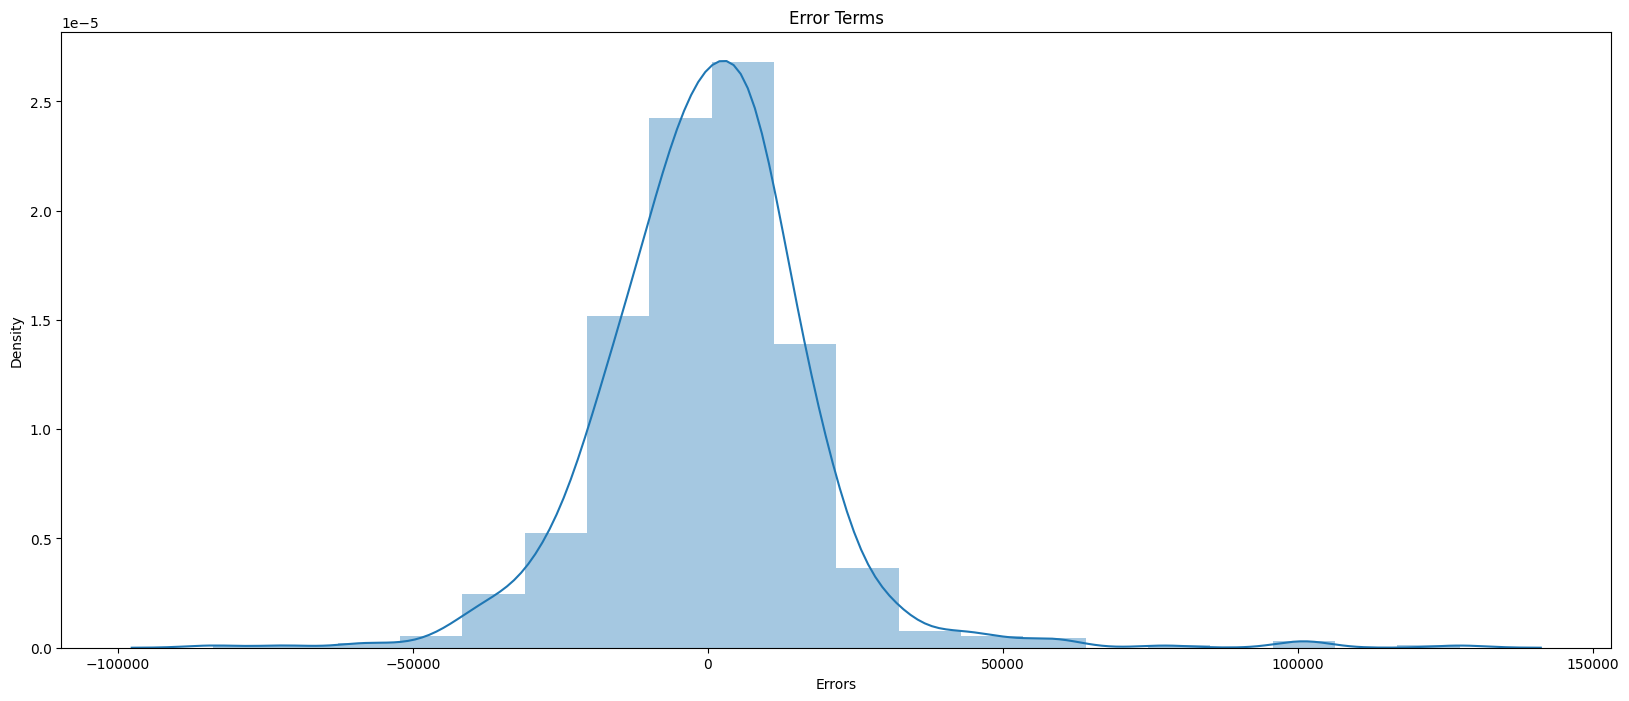

In [153]:
#Checking if error terms are normally distributed
plt.figure(figsize=(20, 8))
sns.distplot((y_train - y_pred_train), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')   

##### Doubling Alpha Value : Ridge

In [154]:
alpha = alpha_ridge*2
print(alpha)
double_ridge = Ridge(alpha=alpha)

double_ridge.fit(X_train, y_train)

4.0


Ridge(alpha=4.0)

In [155]:
# Metrics
y_pred_train = double_ridge.predict(X_train)
y_pred_test = double_ridge.predict(X_test)

ridge_double_metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
ridge_double_metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
ridge_double_metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
ridge_double_metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
ridge_double_metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
ridge_double_metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
ridge_double_metric.append(mse_test_lr**0.5)

R2 Train :  0.9243350358742537
R2 Test :  0.9000827101703184
Residual Sum Squared Train :  306904297761.83496
Residual Sum Squared Test :  155470188988.00177
Mean Squared Error Train: 346393112.59800786
Mean Squared Error Test: 408058238.81365293


In [156]:
ridge_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }
#ridge_metric = pd.DataFrame(ridge_table ,columns = ['Metric', 'Linear Regression'] )
ridge_metric_cols = pd.DataFrame(ridge_table,columns = ['Metric'])
optimalAplha = pd.Series(ridge_metric, name = 'Aplha=2')
doubleAplha = pd.Series(ridge_double_metric, name = 'Aplha=4')
final_ridge_metric = pd.concat([ridge_metric_cols,optimalAplha, doubleAplha], axis = 1)
final_ridge_metric


,Metric,Aplha=2,Aplha=4
0,R2 Score (Train),9.305749e-01,9.243350e-01
1,R2 Score (Test),8.996574e-01,9.000827e-01
2,RSS (Train),2.815946e+11,3.069043e+11
3,RSS (Test),1.561319e+11,1.554702e+11
4,MSE (Train),1.782770e+04,1.861164e+04
5,MSE (Test),2.024340e+04,2.020045e+04


##### Lasso


In [157]:
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [158]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 100}


In [159]:
#Fitting Lasso model for alpha = 100

alpha_lasso = model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha_lasso)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=100)

In [160]:
lasso.coef_

array([-1.62303754e+04,  7.34567943e+03,  0.00000000e+00,  7.90579009e+04,
        3.77417379e+04,  6.63944740e+01,  2.25770503e+04,  0.00000000e+00,
        0.00000000e+00,  7.31196486e+04,  6.51526017e+03,  0.00000000e+00,
        1.58302902e+05,  3.83794573e+03, -0.00000000e+00,  2.54990105e+02,
        4.28995982e+03, -0.00000000e+00, -1.99799114e+04,  1.25425411e+04,
        3.05140220e+04,  7.03675437e+03,  4.14232279e+03, -0.00000000e+00,
        9.86869385e+03, -4.91504153e+02, -2.61429249e+04,  0.00000000e+00,
        0.00000000e+00,  6.93941389e+03,  0.00000000e+00,  8.37330316e+03,
       -0.00000000e+00,  4.46210146e+02,  4.05897025e+03, -0.00000000e+00,
       -0.00000000e+00,  7.52629372e+03, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  1.93547547e+03, -3.11321676e+02,  5.31476425e+03,
        2.36428161e+02, -5.84084160e+02,  1.90196931e+04, -2.39704451e+03,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -1.78815984e+03,
       -3.03452335e+03,  

In [161]:
# Calculating metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric_lasso = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
metric_lasso.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
metric_lasso.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
metric_lasso.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
metric_lasso.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
metric_lasso.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
metric_lasso.append(mse_test_lr**0.5)

R2 Train :  0.9194376854990648
R2 Test :  0.9131613672991467
Residual Sum Squared Train :  326768417108.9767
Residual Sum Squared Test :  135119944310.68701
Mean Squared Error Train: 368813111.8611475
Mean Squared Error Test: 354645523.1251628


Observation
  - There is no huge difference between R2 for  Train and Test Data

Text(0.5, 0, 'Errors')

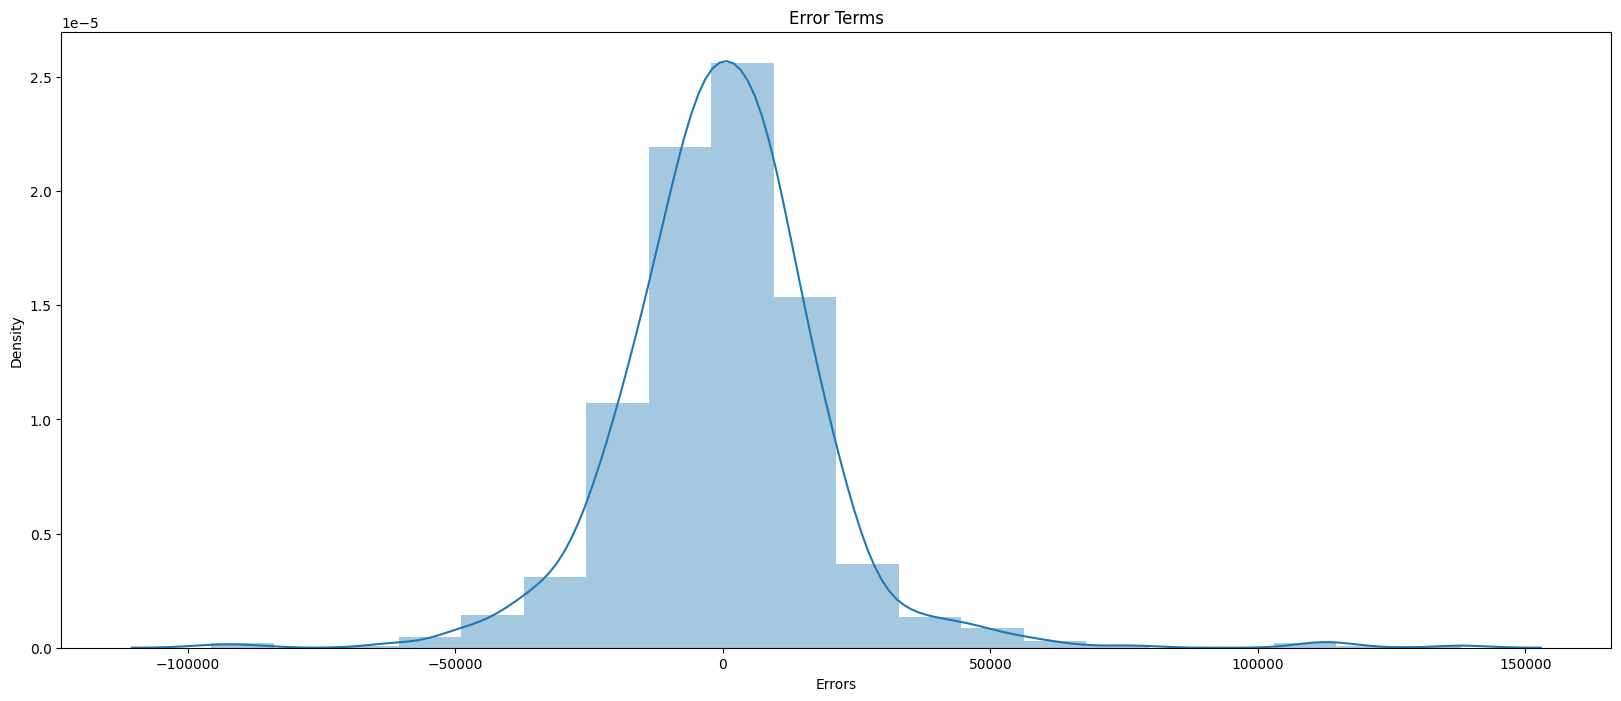

In [162]:
#Checking if error terms are normally distributed
plt.figure(figsize=(20, 8))
sns.distplot((y_train - y_pred_train), bins = 20)
plt.title('Error Terms')
plt.xlabel('Errors')    

The error terms are normally distributed

##### Doubling Alpha Value : Lasso

In [163]:
alpha_lasso = alpha_lasso*2
print(alpha_lasso)

double_lasso = Lasso(alpha=alpha_lasso)
        
double_lasso.fit(X_train, y_train) 


200


Lasso(alpha=200)

In [164]:
y_pred_train = double_lasso.predict(X_train)
y_pred_test = double_lasso.predict(X_test)

metric_lasso_double = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2 Train : ",r2_train_lr)
metric_lasso_double.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2 Test : ",r2_test_lr)
metric_lasso_double.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("Residual Sum Squared Train : ",rss1_lr)
metric_lasso_double.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("Residual Sum Squared Test : ",rss2_lr)
metric_lasso_double.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("Mean Squared Error Train:",mse_train_lr)
metric_lasso_double.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("Mean Squared Error Test:",mse_test_lr)
metric_lasso_double.append(mse_test_lr**0.5)

R2 Train :  0.9088783720160808
R2 Test :  0.9115608767626272
Residual Sum Squared Train :  369597997837.4713
Residual Sum Squared Test :  137610289741.49615
Mean Squared Error Train: 417153496.4305545
Mean Squared Error Test: 361181862.83857256


In [165]:
lasso_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)']
        }
lasso_metric_cols = pd.DataFrame(lasso_table,columns = ['Metric'])
optimalAplha = pd.Series(metric_lasso, name = 'Aplha=100')
doubleAplha = pd.Series(metric_lasso_double, name = 'Aplha=200')
final_lasso_metric = pd.concat([lasso_metric_cols,optimalAplha, doubleAplha], axis = 1)
final_lasso_metric

,Metric,Aplha=100,Aplha=200
0,R2 Score (Train),9.194377e-01,9.088784e-01
1,R2 Score (Test),9.131614e-01,9.115609e-01
2,RSS (Train),3.267684e+11,3.695980e+11
3,RSS (Test),1.351199e+11,1.376103e+11
4,MSE (Train),1.920451e+04,2.042434e+04
5,MSE (Test),1.883203e+04,1.900479e+04


##### Most Important Predictor Variables After doubling alpha

In [166]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge'] = ridge.coef_
betas.sort_values(by=['Ridge'], ascending=False).head(10)

,Ridge
GrLivArea,90381.655668
OverallQual,58551.333114
TotalBsmtSF,47689.747833
BsmtFinSF1,39979.667220
Neighborhood_StoneBr,36890.553111
2ndFlrSF,36448.016793
OverallCond,35069.839246
GarageArea,30486.541562
LotArea,29162.821719
BsmtUnfSF,27212.742114


In [167]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Ridge Doubled'] = double_ridge.coef_
betas.sort_values(by=['Ridge Doubled'], ascending=False).head(10)

,Ridge Doubled
GrLivArea,74931.919610
OverallQual,54658.868670
TotalBsmtSF,43573.793077
BsmtFinSF1,37559.979635
2ndFlrSF,33189.470350
Neighborhood_StoneBr,32682.302619
OverallCond,31077.923612
GarageArea,30200.402183
BsmtUnfSF,25448.515443
FullBath,21011.490597


In [168]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso'] = lasso.coef_
betas.sort_values(by=['Lasso'], ascending=False).head(10)

,Lasso
GrLivArea,158302.901688
OverallQual,79057.900910
TotalBsmtSF,73119.648622
OverallCond,37741.737939
Neighborhood_StoneBr,31849.796656
GarageArea,30514.022005
BsmtFinSF1,22577.050316
SaleType_New,21642.732296
Neighborhood_Crawfor,19019.693084
BsmtExposure_Gd,16192.146457


In [169]:
betas = pd.DataFrame(index=X_train.columns)
betas.rows = X_train.columns
betas['Lasso Doubled'] = double_lasso.coef_
betas.sort_values(by=['Lasso Doubled'], ascending=False).head(10)

,Lasso Doubled
GrLivArea,157706.821960
OverallQual,88709.955591
TotalBsmtSF,62418.494056
OverallCond,32911.823124
GarageArea,32004.120727
BsmtFinSF1,26181.778723
Neighborhood_StoneBr,22746.645899
SaleType_New,21925.914041
BsmtExposure_Gd,16961.771406
Neighborhood_Crawfor,16656.853938


##### Question 3 : Most Important Predictors, after dropping top 5 predictors 

In [170]:
top5_lasso = ['GrLivArea','OverallQual','TotalBsmtSF','OverallCond','Neighborhood_StoneBr']
#Dropping current top5 lasso predictors
X_train_lasso_pred2 = X_train.drop(top5_lasso,axis=1)
X_test_lasso_pred2 = X_train.drop(top5_lasso,axis=1)


In [171]:
X_train_lasso_pred2.head()

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
921,0.411765,0.466667,0.041817,0.000000,0.613469,0.00000,0.088637,0.510451,0.0,0.666667,...,0,0,0,0,1,0,0,0,1,0
1212,0.058824,0.240000,0.045277,0.000000,0.194680,0.00000,0.154644,0.000000,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0
491,0.176471,0.626667,0.046199,0.000000,0.228070,0.11194,0.112211,0.341034,0.0,0.333333,...,0,0,0,0,1,0,0,0,1,0
1301,0.294118,0.493333,0.033967,0.000000,0.309564,0.00000,0.105611,0.407591,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0
176,0.235294,0.866667,0.049513,0.676768,0.470289,0.00000,0.150872,0.492849,0.0,0.000000,...,0,0,0,0,1,0,0,0,1,0


In [172]:
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train_lasso_pred2, y_train) 
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.5}


In [173]:
#Lasso alpha changed to 0.5 after dropping those predictor variables
#Fitting Lasso model for alpha = 0.5

alpha_lasso2 = model_cv.best_params_['alpha']

lasso_dropped = Lasso(alpha=alpha_lasso2)
        
lasso_dropped.fit(X_train_lasso_pred2, y_train) 

Lasso(alpha=0.5)

In [174]:
betas = pd.DataFrame(index=X_train_lasso_pred2.columns)
betas.rows = X_train_lasso_pred2.columns
betas['Lasso Dropped'] = lasso_dropped.coef_
betas.sort_values(by=['Lasso Dropped'], ascending=False).head(10)

,Lasso Dropped
GarageType_No Garage,196594.960469
GarageCond_Po,174983.295335
GarageCond_TA,172323.163268
GarageCond_Fa,163849.659026
GarageCond_Gd,160031.305962
BsmtFinSF1,121561.269160
BsmtUnfSF,118303.390271
2ndFlrSF,105087.230668
SaleType_New,97308.788592
LotArea,88225.424159


### Observations on Linear Regression, Ridge and Lasso

In [175]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': lr_metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(ridge_metric, name = 'Ridge Regression')
ls_metric = pd.Series(metric_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.419590e-01,9.305749e-01,9.194377e-01
1,R2 Score (Test),-9.551795e+17,8.996574e-01,9.131614e-01
2,RSS (Train),2.354198e+11,2.815946e+11,3.267684e+11
3,RSS (Test),1.486249e+30,1.561319e+11,1.351199e+11
4,MSE (Train),1.630064e+04,1.782770e+04,1.920451e+04
5,MSE (Test),6.245731e+13,2.024340e+04,1.883203e+04


If we see the above table
- We can see how well Ridge and Lasso did compared to Linear Regression.
- We can also observe that Lasso Regression did a bit well compared to Ridge in this scenario for both train and test data
- The RMSE values for Ridge & Lasso is less compared to Linear

#### Changes in Coefficients

In [176]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
betas['Linear'] = lr.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.head(100)

,Linear,Ridge,Lasso
MSSubClass,-2.250330e+04,-15389.707367,-16230.375382
LotFrontage,1.730309e+03,10311.919555,7345.679428
LotArea,8.825818e+04,29162.821719,0.000000
OverallQual,5.256841e+04,58551.333114,79057.900910
OverallCond,4.186597e+04,35069.839246,37741.737939
MasVnrArea,3.620789e+03,3753.053406,66.394474
BsmtFinSF1,-3.524850e+16,39979.667220,22577.050316
BsmtFinSF2,-2.940367e+16,16642.492233,0.000000
BsmtUnfSF,-4.231016e+16,27212.742114,0.000000
TotalBsmtSF,6.395398e+16,47689.747833,73119.648622


Observation:
- We clearly see that Coefficients changes w.r.t Linear, Ridge and Lasso Regression
- We also observe that in Lasso, It has done feature elimination by making those coefficients as 9